In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
class Graph:
    def __init__(self, matr: list):
        self.graph = matr
        
    @classmethod
    def init_by_adjacency_list(cls, list1):
        x = cls(list1)
        return x
        
    @classmethod
    def init_by_adjacency_matrix(cls, matrix):
        graph = [[]]
        for i in range(len(matrix) - 1):
            graph.append([])
        for i in range(len(matrix)):
            for j in range(i):
                if matrix[i][j] == 1:
                    graph[i].append(j)
                    graph[j].append(i)
        x = cls(graph)
        return x
        
    @classmethod
    def init_by_incendent_matrix(cls, matrix):
        graph = [[]]
        for i in range(len(matrix) - 1):
            graph.append([])
        for i in range(len(matrix[0])):
            cnt = []
            for j in range(len(matrix)):
                if matrix[j][i] == 1:
                     cnt.append(j)
            cnt1 = cnt.pop()
            cnt2 = cnt.pop()
            graph[cnt1].append(cnt2)
            graph[cnt2].append(cnt1)
        x = cls(graph)
        return x
    
    @classmethod
    def init_by_edges_list(cls, list_pairs: list):
        edges = 0
        graph = []
        for i in range(len(list_pairs)):
            if list_pairs[i][0] > edges:
                edges = list_pairs[i][0]
            if list_pairs[i][1] > edges:
                edges = list_pairs[i][1]
        edges += 1
        for i in range(edges):
            graph.append([])
        for i in range(len(list_pairs)):
            graph[list_pairs[i][0]].append(list_pairs[i][1])
            graph[list_pairs[i][1]].append(list_pairs[i][0])
        x = cls(graph)
        return x
        
    def add_arc(self, u: int, v: int):
        self.graph[u].append(v)
        
    def del_arc(self, u: int, v: int):
        self.graph[u].pop(v)
    
    def add_vertex(self):
        self.graph.append(len(self.graph))
        
    def del_vertex(self, vertex: int):
        self.graph.pop(vertex)
        
        
    def get_graph_by_adjacency_list(self):
        return self.graph
    
    def get_graph_by_adjacency_matrix(self):
        matr = []
        for i in range(len(self.graph)):
            matr.append([])
            for j in range(len(self.graph)):
                matr[i].append(0)
            
        for i in range(len(self.graph) - 1):
            for j in range(len(self.graph[i])):
                matr[i][self.graph[i][j]] = 1
                matr[self.graph[i][j]][i] = 1
        return matr
    
    
    def get_graph_by_incendent_matrix(self):
        matr = []
        for i in range(len(self.graph)):
            matr.append([])
            for j in range(len(self.graph)):
                matr[i].append(0)
            
            
        for i in range(len(self.graph)):
            for j in range(len(self.graph[i]) - 1):
                matr[i][self.graph[i][j]] = 1
                
        return matr
    
    def find_medians(self):
        matr = self.get_graph_by_adjacency_matrix()
        matr_ways = []
        rez = []
        for i in range(len(matr)):
            for j in range(len(matr)):
                if matr[i][j] == 0:
                    matr[i][j] = len(matr) + 10

        for i in range(len(matr)):
             matr_ways.append([])
                
        for i in range(len(matr)):
            for j in range(len(matr)):
                matr_ways[i].append(j)
                    
        for i in range(len(matr)):
            for j in range(len(matr)):
                for k in range(len(matr)):
                    if matr[i][k] != (len(matr) + 10) and matr[k][j] != (len(matr) + 10) and matr[i][k] + matr[k][j] < matr[i][j]:
                        matr[i][j] = matr[i][k] + matr[k][j]
                        matr_ways[i][j] = matr_ways[i][k]
                        
                        
        minimum = len(matr) * len(matr)
        cnt = 0
        for i in range(len(matr)):
            for j in range(len(matr)):
                cnt += matr[i][j]
            if minimum > cnt:
                minimum = cnt
            cnt = 0
                    
        for i in range(len(matr)):
            for j in range(len(matr)):
                cnt += matr[i][j]
            if minimum == cnt:
                rez.append(i)
            cnt = 0
                
        return rez
    
    def get_graph_by_edges_list(self):
        matr = []
        for i in range(len(self.graph)):
            for j in range(len(self.graph[i])):
                matr.append((i, self.graph[i][j]))
        return matr
    
    def print_graph(graph):
        for line in graph:
            print(*line)
    
    def get_graph(self):
        return self.graph
        
    def __del__(self):
        print()

In [ ]:
def draw_graph(graph, nodes = []):
    G = nx.DiGraph()
    for i in range(len(graph) - 1):
        G.add_node(i)
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            G.add_edge(i, graph[i][j])
    nx.draw_shell(G, nlist=[range(len(graph)), range(len(graph))], with_labels=True, 
                  font_weight='bold', node_size = 1200, arrows = True)

In [ ]:
def get_index_zero_in_row(matrix_adj, index_row):
    index = -1
    for i in range(len(matrix_adj[0])-1):
        if matrix_adj[index_row][i] == 0:
            index = i
            break
    return index
    
def coloring_by_manapulating_rows(matrix_adj):
    for i in range(len(matrix_adj[0])-1):
        for j in range(len(matrix_adj[0])-1):
            if i == j:
                matrix_adj[i][j] = 1

    available_rows = [True for x in range(len(matrix_adj[0])-1)]
    colors = [-1 for x in range(len(matrix_adj[0])-1)]
    color = 0
    continye_cycle = True

    for i in range(len(matrix_adj[0])-1):
        if available_rows[i]:
            while 0 in matrix_adj[i] and continye_cycle:
                j = get_index_zero_in_row(matrix_adj, i)
                if available_rows[j]:
                    for k in range(len(matrix_adj[0])-1):
                        if matrix_adj[i][k] == 1 and matrix_adj[j][k] == 1:
                            matrix_adj[i][k] = 1
                        else:
                            matrix_adj[i][k] = matrix_adj[i][k] + matrix_adj[j][k]
                    available_rows[j] = False
                    colors[j] = color
                else:
                    continye_cycle = False
            colors[i] = color
            available_rows[i] = False
            color += 1
    for i in range(len(matrix_adj[0])-1):
        print(str(i) + ": " + str(colors[i]))

In [ ]:
def greedy_coloring(self, graphh):
    return coloring.greedy_color(graphh, strategy="largest_first")

In [ ]:
def bfs(graph, node):
  visited = []
  queue = []

  queue.append(node)
  visited.append(node)

  while queue:
    s = queue.pop(0)
    print (s, end = " ")

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

In [ ]:
def deep_first_search(graph, vertex, visited):
    visited[vertex] = True
    print(vertex, end="->")
    for vert in graph[vertex]:
        if visited[vert] == False:
            print(vert)
            deep_first_search(graph, vert, visited)

In [ ]:
def init_DFS(graph, vertex):
    visited = []
    for i in range(len(graph)):
        visited.append(False)
    val = deep_first_search(graph, vertex, visited)

In [ ]:
def greedyColoring(adj, V):
    result = [-1] * V
    result[0] = 0;

    available = [False] * V
 
    for u in range(1, V):
        for i in adj[u]:
            if (result[i] != -1):
                available[result[i]] = True
        cr = 0
        while cr < V:
            if (available[cr] == False):
                break
            cr += 1
        result[u] = cr
        for i in adj[u]:
            if (result[i] != -1):
                available[result[i]] = False
 
    for u in range(V):
        print(u, ":", result[u])

In [ ]:
public void edgeColoring(Edge[] graphEdges) {
        int[] colors;
        int dimension = graphEdges.length;
        int[][] newMatrix = new int[dimension][dimension];

        for (int i = 0; i < dimension; i++) {
            for (int j = 0; j < dimension; j++) {
                if (i == j) {
                    newMatrix[i][j] = 0;
                } else {
                    if (isEdgesAdjacency(graphEdges[i], graphEdges[j])) {
                        newMatrix[i][j] = 1;
                    } else {
                        newMatrix[i][j] = 0;
                    }
                }
            }
        }

        Graph newGraph = new Graph(newMatrix, newMatrix.length);
        colors = newGraph.greedyColoringReturnColors(newGraph.writeAdjacencyList());
        for (int i = 0; i < graphEdges.length; i++){
            System.out.println("Edge " + graphEdges[i].toString() + " - color ---> " + colors[i]);
        }
    }




        int[][] newMatrix = new int[dimension][dimension];

        for (int i = 0; i < dimension; i++) {
            for (int j = 0; j < dimension; j++) {
                if (i == j) {
                    newMatrix[i][j] = 0;
                } else {
                    if (isEdgesAdjacency(graphEdges[i], graphEdges[j])) {
                        newMatrix[i][j] = 1;
                    } else {
                        newMatrix[i][j] = 0;
                    }
                }
            }
        }

        Graph newGraph = new Graph(newMatrix, newMatrix.length);
        colors = newGraph.greedyColoringReturnColors(newGraph.writeAdjacencyList());
        for (int i = 0; i < graphEdges.length; i++){
            System.out.println("Edge " + graphEdges[i].toString() + " - color ---> " + colors[i]);
        }
    }


Матрица смежности
[[0, 1, 1, 1, 0, 0, 1], [1, 0, 1, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 0], [0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 1, 0, 1], [1, 1, 0, 0, 0, 1, 0]]
Матрица инцидентности
[[0, 1, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 0, 1, 0]]
Cписок дуг
[(0, 1), (0, 2), (0, 3), (0, 3), (0, 6), (1, 0), (1, 2), (1, 6), (2, 0), (2, 1), (2, 3), (3, 0), (3, 2), (3, 0), (3, 4), (3, 5), (4, 3), (4, 5), (5, 3), (5, 4), (5, 6), (6, 1), (6, 5), (6, 0)]
Cписок смежности
[[1, 2, 3, 3, 6], [0, 2, 6], [0, 1, 3], [0, 2, 0, 4, 5], [3, 5], [3, 4, 6], [1, 5, 0]]
coloring by row
0: 0
1: 1
2: 2
3: 1
4: 0
5: 3
BFS
0 1 2 3 6 4 5 None
DFS
0->1
1->2
2->3
3->4
4->5
5->6
6->None
coloring greedy algo
0 : 0
1 : 1
2 : 1
3 : 1
4 : 1
5 : 2
6 : 0
-------------------


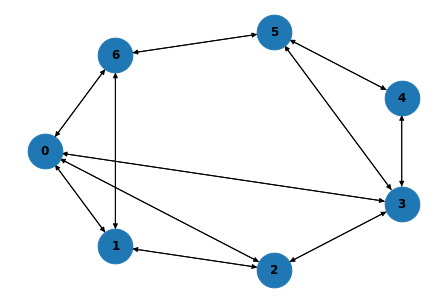

In [ ]:
edges_list = [(0,1), (0,2), (0,3), (1,2), (1,6), (2,3), (3,0), (3,4), (3,5), (4,5), (5,6), (6,0)]
obj1 = Graph.init_by_edges_list(edges_list)

print("Матрица смежности")
print(obj1.get_graph_by_adjacency_matrix())

print("Матрица инцидентности")
print(obj1.get_graph_by_incendent_matrix())

print("Cписок дуг")
print(obj1.get_graph_by_edges_list())

print("Cписок смежности")
print(obj1.get_graph_by_adjacency_list())

print("coloring by row")
coloring_by_manapulating_rows(obj1.get_graph_by_adjacency_matrix())


print("BFS")
print(bfs(obj1.get_graph_by_adjacency_list(), 0))

print("DFS")
print(init_DFS(obj1.get_graph(), 0))

print("coloring greedy algo")
greedyColoring(obj1.get_graph_by_edges_list(), 7)

draw_graph(obj1.get_graph())
print("-------------------")



Матрица смежности
[[0, 1, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0, 0], [0, 0, 0, 1, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 0, 0, 1, 1, 0]]
Матрица инцидентности
[[0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Cписок дуг
[(0, 1), (0, 2), (0, 3), (2, 3), (2, 5), (3, 4), (4, 6), (5, 4), (5, 6), (6, 0)]
Cписок смежности
[[1, 2, 3], [], [3, 5], [4], [6], [4, 6], [0]]
BFS
0 1 2 3 5 4 6 None
DFS
0->1
1->2
2->3
3->4
4->6
6->5
5->None
coloring greedy algo
0 : 0
1 : 1
2 : 1
3 : 0
4 : 0
5 : 1
6 : 1
7 : 2
Coloring by manipulating rows in adjacency list
0: 0
1: 1
2: 2
3: 3
4: 0
5: 0
-------------------


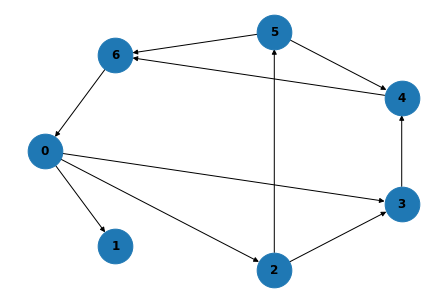

In [ ]:
edges_list1 = [(0,1), (0,2), (0,3), (2,3), (2,5), (3,4), (4,6), (5,4), (5,6), (6,0)]
obj2 = OrientiedGraph.init_by_edges_list(edges_list1)
print("Матрица смежности")
print(obj2.get_graph_by_adjacency_matrix())

print("Матрица инцидентности")
print(obj2.get_graph_by_incendent_matrix())

print("Cписок дуг")
print(obj2.get_graph_by_edges_list())

print("Cписок смежности")
print(obj2.get_graph_by_adjacency_list())

print("BFS")
print(bfs(obj2.get_graph_by_adjacency_list(), 0))

print("DFS")
print(init_DFS(obj2.get_graph(), 0))

print("coloring greedy algo")
greedyColoring(obj2.get_graph_by_edges_list(), 8)

print("Coloring by manipulating rows in adjacency list")
coloring_by_manapulating_rows(obj2.get_graph_by_adjacency_matrix())

draw_graph(obj2.get_graph())
print("-------------------")


In [ ]:
edges_list1 = [(0,1), (0,2), (1,2), (1,3), (2,3)]
obj3 = Graph.init_by_edges_list(edges_list1)

edgeColoring(obj3)



Edge coloring
Edge [0,1] - color ---> 1
Edge [0,2] - color ---> 2
Edge [1,2] - color ---> 0
Edge [1,3] - color ---> 2
Edge [2,3] - color ---> 1



In [ ]:
class OrientiedGraph:
    def __init__(self, matr: list):
        self.graph = matr
        
    @classmethod
    def init_by_adjacency_list(cls, list1):
        x = cls(list1)
        return x
        
    @classmethod
    def init_by_adjacency_matrix(cls, matrix):
        graph = [[]]
        for i in range(len(matrix) - 1):
            graph.append([])
        for i in range(len(matrix)):
            for j in range(i):
                if matrix[i][j] == 1:
                    graph[j].append(i)
        x = cls(graph)
        return x
        
    @classmethod
    def init_by_incendent_matrix(cls, matrix):
        graph = [[]]
        for i in range(len(matrix) - 1):
            graph.append([])
        for i in range(len(matrix[0])):
            cnt = []
            for j in range(len(matrix)):
                if matrix[j][i] == 1:
                     cnt.append(j)
            cnt1 = cnt.pop()
            # cnt2 = cnt.pop()
            graph[cnt1].append(cnt2)
            # graph[cnt2].append(cnt1)
        x = cls(graph)
        return x
    
    @classmethod
    def init_by_edges_list(cls, list_pairs: list):
        edges = 0
        graph = []
        for i in range(len(list_pairs)):
            if list_pairs[i][0] > edges:
                edges = list_pairs[i][0]
            if list_pairs[i][1] > edges:
                edges = list_pairs[i][1]
        edges += 1
        for i in range(edges):
            graph.append([])
        for i in range(len(list_pairs)):
            graph[list_pairs[i][0]].append(list_pairs[i][1])
            # graph[list_pairs[i][1]].append(list_pairs[i][0])
        x = cls(graph)
        return x
        
    def add_arc(self, u: int, v: int):
        self.graph[u].append(v)
        
    def del_arc(self, u: int, v: int):
        self.graph[u].pop(v)
    
    def add_vertex(self):
        self.graph.append(len(self.graph))
        
    def del_vertex(self, vertex: int):
        self.graph.pop(vertex)
        
        
    def get_graph_by_adjacency_list(self):
        return self.graph
    
    def get_graph_by_adjacency_matrix(self):
        matr = []
        for i in range(len(self.graph)):
            matr.append([])
            for j in range(len(self.graph)):
                matr[i].append(0)
            
        for i in range(len(self.graph) - 1):
            for j in range(len(self.graph[i])):
                matr[i][self.graph[i][j]] = 1
                matr[self.graph[i][j]][i] = 1
        return matr
    
    
    def get_graph_by_incendent_matrix(self):
        matr = []
        for i in range(len(self.graph)):
            matr.append([])
            for j in range(len(self.graph)):
                matr[i].append(0)
            
            
        for i in range(len(self.graph)):
            for j in range(len(self.graph[i]) - 1):
                matr[i][self.graph[i][j]] = 1
                
        return matr
    
    def find_medians(self):
        matr = self.get_graph_by_adjacency_matrix()
        matr_ways = []
        rez = []
        for i in range(len(matr)):
            for j in range(len(matr)):
                if matr[i][j] == 0:
                    matr[i][j] = len(matr) + 10

        for i in range(len(matr)):
             matr_ways.append([])
                
        for i in range(len(matr)):
            for j in range(len(matr)):
                matr_ways[i].append(j)
                    
        for i in range(len(matr)):
            for j in range(len(matr)):
                for k in range(len(matr)):
                    if matr[i][k] != (len(matr) + 10) and matr[k][j] != (len(matr) + 10) and matr[i][k] + matr[k][j] < matr[i][j]:
                        matr[i][j] = matr[i][k] + matr[k][j]
                        matr_ways[i][j] = matr_ways[i][k]
                        
                        
        minimum = len(matr) * len(matr)
        cnt = 0
        for i in range(len(matr)):
            for j in range(len(matr)):
                cnt += matr[i][j]
            if minimum > cnt:
                minimum = cnt
            cnt = 0
                    
        for i in range(len(matr)):
            for j in range(len(matr)):
                cnt += matr[i][j]
            if minimum == cnt:
                rez.append(i)
            cnt = 0
                
        return rez
    
    def get_graph_by_edges_list(self):
        matr = []
        for i in range(len(self.graph)):
            for j in range(len(self.graph[i])):
                matr.append((i, self.graph[i][j]))
        return matr
    
    def print_graph(graph):
        for line in graph:
            print(*line)
    
    def get_graph(self):
        return self.graph
        
    def __del__(self):
        print()